In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import defaultdict

DATE_COLUMN = 'date'
EMOTION_COLUMN = 'emotion'
DATA_DIR = ('혁명은 내 취향이 아니었다_comment_data.csv')

In [2]:
data = pd.read_csv(DATA_DIR, encoding="utf-8")
data[DATE_COLUMN] = pd.to_datetime(data[DATE_COLUMN])

temp = []

for emote in data[EMOTION_COLUMN]:
    temp.append(eval(emote))
    
data[EMOTION_COLUMN] = temp

In [3]:
categories = ['불평/불만', '환영/호의', '감동/감탄', '지긋지긋', '고마움', '슬픔', '화남/분노', '존경', '기대감', '우쭐댐/무시함', '안타까움/실망', '비장함', '의심/불신', '뿌듯함', '편안/쾌적', '신기함/관심', '아껴주는', '부끄러움', '공포/무서움', '절망', '한심함', '역겨움/징그러움', '짜증', '어이없음', '없음', '패배/자기혐오', '귀찮음', '힘듦/지침', '즐거움/신남', '깨달음', '죄책감', '증오/혐오', '흐뭇함(귀여움/예쁨)', '당황/난처', '경악', '부담/안_내킴', '서러움', '재미없음', '불쌍함/연민', '놀람', '행복', '불안/걱정', '기쁨', '안심/신뢰']

In [7]:
stories = [defaultdict(int) for _ in range(max(list(data['story_num'])) + 1)]

In [8]:
for emotes, like, num in zip(data[EMOTION_COLUMN], data['like'], data['story_num']):
    for emote in emotes:
        stories[num][emote] += (1 + like)

In [12]:
temp = list(stories[1].items())

temp.sort(key=lambda x: x[1], reverse=True)

emo_keys = [key for key, _ in temp]
emo_vals = [val for _, val in temp]

<BarContainer object of 28 artists>

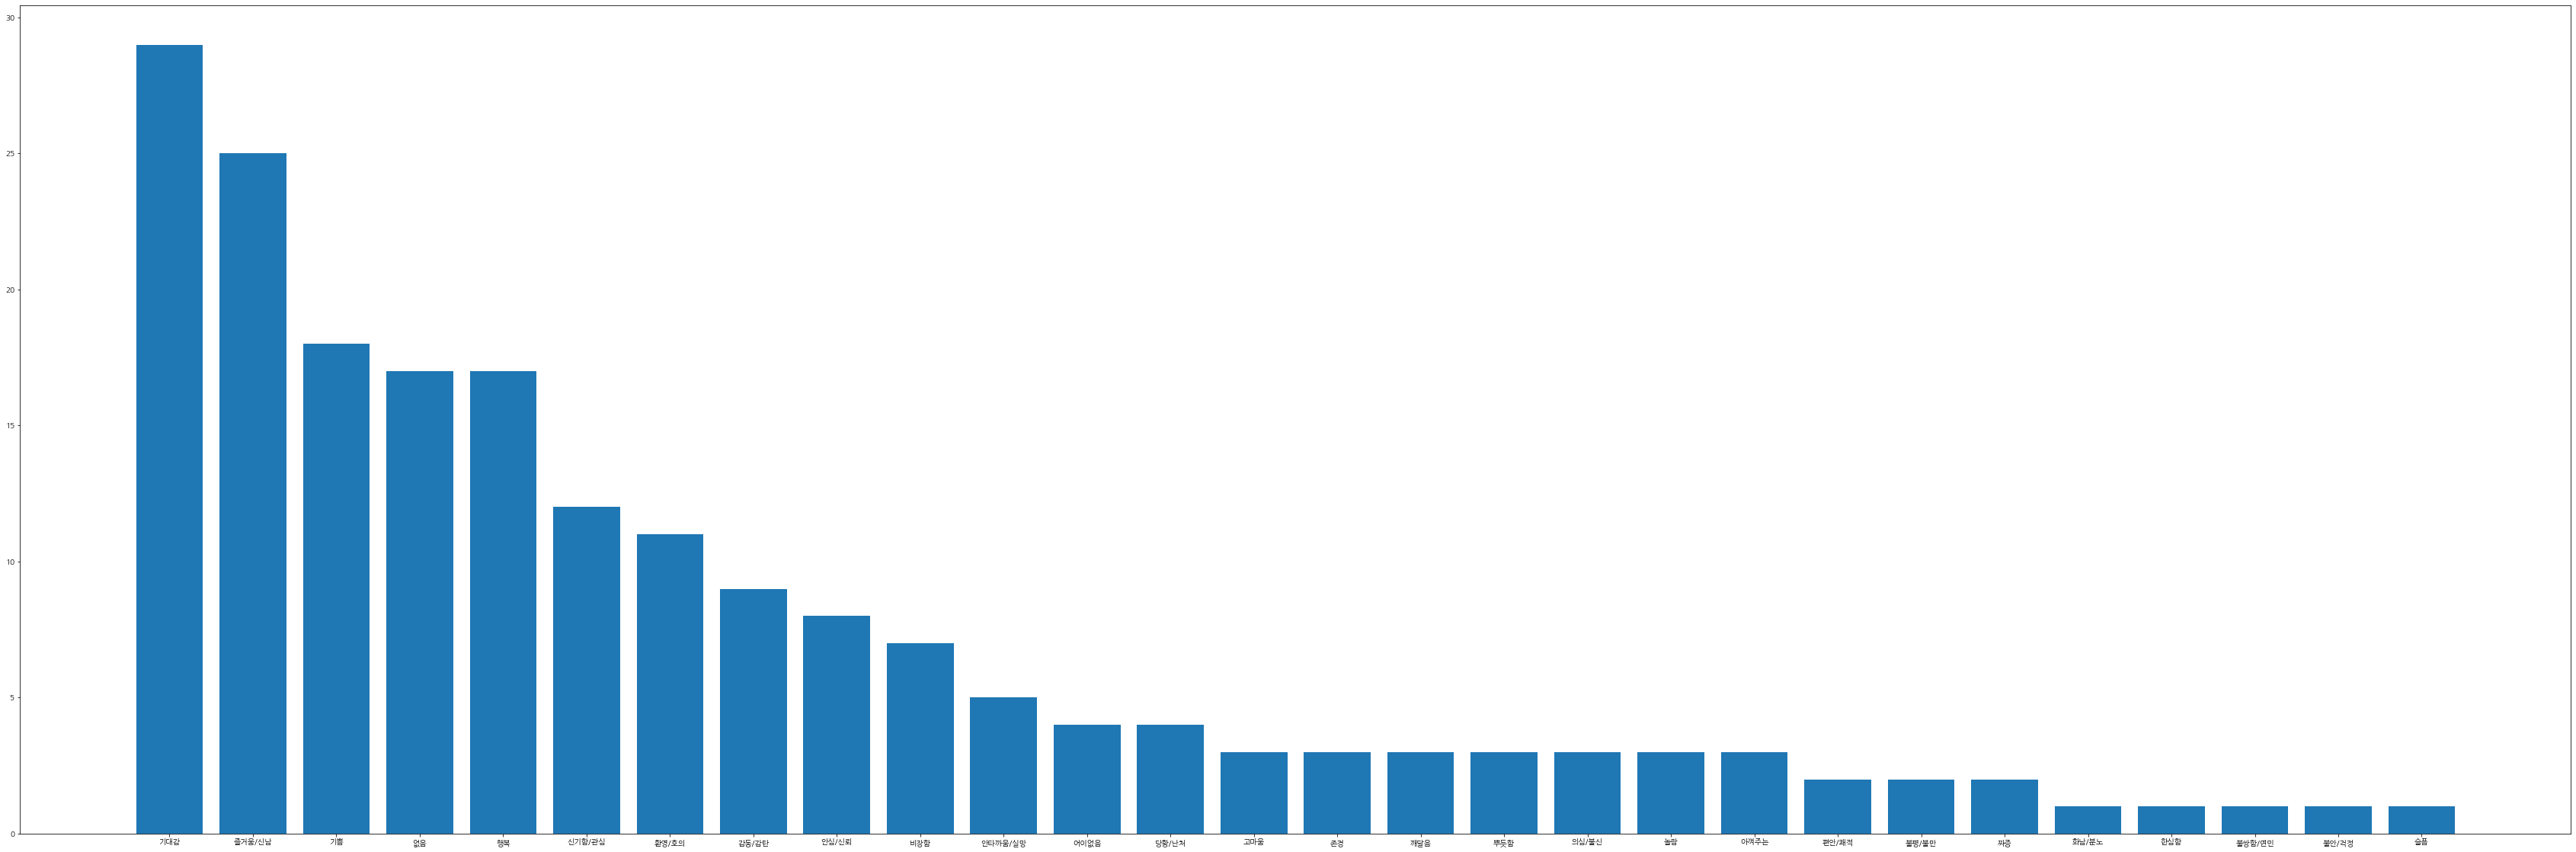

In [13]:
plt.rcParams['font.family'] = 'NanumGothic'
fig, axs = plt.subplots(figsize=(60, 20))
axs.bar(emo_keys, emo_vals)